# Pandas
- data sous la forme de DataFrame, Series
- I/O: SQL (SQLAlchemy), csv, excel, json, ..., tuple/dict
- cleaning, transforming, ...

In [305]:
import pandas as pd
import numpy as np
import statistics
import locale
import functools
import matplotlib
import matplotlib.pyplot as plt

In [301]:
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [304]:
matplotlib.rcsetup.all_backends

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo',
 'agg',
 'cairo',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']

In [2]:
dfMeteoBC = pd.read_csv('meteo/08-station-meteo-toulouse-basso-cambo.csv',
                       sep=';',
                       parse_dates=['heure_de_paris','heure_utc'])
dfMeteoBC.head(3)  # or tail

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
0,10c914701aa00390ecbc4800,8.0,84.0,14.0,0.0,100100.0,114.0,ISS,0.0,315.0,7.0,18.0,14.6,2020-06-09 10:30:00+02:00,2020-06-09 08:30:00+00:00
1,10c815d0168804102c5a1800,8.0,81.0,13.0,0.0,99800.0,130.0,ISS,0.0,292.5,1.0,6.0,14.5,2020-06-08 13:15:00+02:00,2020-06-08 11:15:00+00:00
2,10c814d0862803910c584c00,8.0,69.0,12.0,0.0,99800.0,114.0,ISS,0.0,270.0,8.0,19.0,16.1,2020-06-08 11:15:00+02:00,2020-06-08 09:15:00+00:00


In [3]:
dfMeteoBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109303 entries, 0 to 109302
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype              
---  ------                                      --------------   -----              
 0   data                                        109303 non-null  object             
 1   id                                          109298 non-null  float64            
 2   humidite                                    109297 non-null  float64            
 3   direction_du_vecteur_de_vent_max            109297 non-null  float64            
 4   pluie_intensite_max                         109297 non-null  float64            
 5   pression                                    109297 non-null  float64            
 6   direction_du_vecteur_vent_moyen             109297 non-null  float64            
 7   type_de_station                             109297 non-null  object             
 8   pluie                   

In [4]:
dfMeteoBC.loc[0,'heure_utc']

Timestamp('2020-06-09 08:30:00+0000', tz='UTC')

In [5]:
dfMeteoBC.loc[0,'heure_de_paris']

datetime.datetime(2020, 6, 9, 10, 30, tzinfo=tzoffset(None, 7200))

<AxesSubplot:>

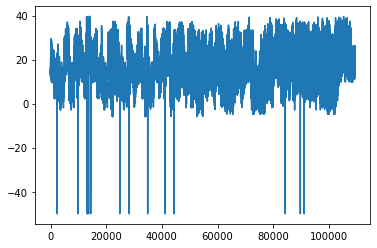

In [6]:
dfMeteoBC.temperature.plot()

In [7]:
dfMeteoBC['temperature'].min() # call np.nanmin

-50.1

In [8]:
dfMeteoBC.loc[dfMeteoBC.temperature <= -50, 'temperature'] = np.nan 

In [9]:
dfMeteoBC['temperature'].min()

-5.9

In [10]:
# localisation basée sur les indices de ligne et de colonnes
dfMeteoBC.iloc[10,2]

87.0

In [11]:
dfMeteoBC.sort_values('heure_utc', inplace=True)

<AxesSubplot:>

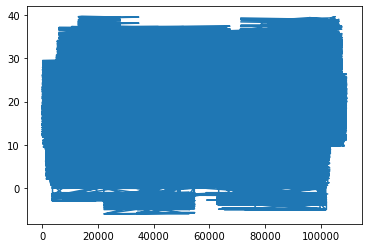

In [12]:
dfMeteoBC.temperature.plot()

In [13]:
dfMeteoBC.head()

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
13660,10d300318a000000c0084c00,8.0,64.0,4.0,0.0,90000.0,0.0,ISS,0.0,90.0,6.0,19.0,20.2,2019-06-19 02:00:00+02:00,2019-06-19 00:00:00+00:00
28231,10d3005186080000a0063800,8.0,65.0,3.0,0.0,90000.0,0.0,ISS,0.0,67.5,5.0,14.0,20.1,2019-06-19 02:15:00+02:00,2019-06-19 00:15:00+00:00
13169,10d30071661002d060183800,8.0,66.0,12.0,0.0,90000.0,90.0,ISS,0.0,270.0,3.0,14.0,19.9,2019-06-19 02:30:00+02:00,2019-06-19 00:30:00+00:00
34899,10d300915e10000000181400,8.0,66.0,12.0,0.0,90000.0,0.0,ISS,0.0,270.0,0.0,5.0,19.7,2019-06-19 02:45:00+02:00,2019-06-19 00:45:00+00:00
13168,10d300b1521802e040181400,8.0,67.0,12.0,0.0,90000.0,92.0,ISS,0.0,270.0,2.0,5.0,19.4,2019-06-19 03:00:00+02:00,2019-06-19 01:00:00+00:00


In [14]:
dfMeteoBC.tail()

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
13662,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
19829,"1,1940250424E+023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
19830,"1,19402102248E+023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
26883,"1,19401704238E+023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
27420,"1,17607300638E+023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [15]:
dfMeteoBC.dropna(subset='heure_utc', inplace=True)

In [16]:
dfMeteoBC.tail()

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,heure_utc
109262,11523692d60800002d2c4c00,8.0,65.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,1.0,19.0,25.5,2022-10-18 14:45:00+02:00,2022-10-18 12:45:00+00:00
105766,115236b2da0800000d2c3800,8.0,65.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,0.0,14.0,25.6,2022-10-18 15:00:00+02:00,2022-10-18 13:00:00+00:00
106678,115236d2de0000000d2c4000,8.0,64.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,0.0,16.0,25.7,2022-10-18 15:15:00+02:00,2022-10-18 13:15:00+00:00
109263,115236f2da0800000d2c3800,8.0,65.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,0.0,14.0,25.6,2022-10-18 15:30:00+02:00,2022-10-18 13:30:00+00:00
109264,11523712da0800000d2c2c00,8.0,65.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,0.0,11.0,25.6,2022-10-18 15:45:00+02:00,2022-10-18 13:45:00+00:00


<AxesSubplot:xlabel='heure_utc'>

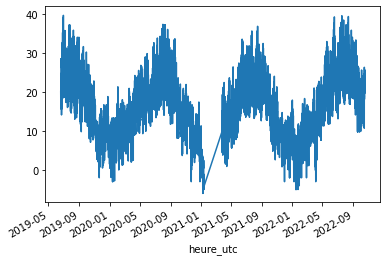

In [17]:
dfMeteoBC.set_index('heure_utc').temperature.plot()

In [19]:
dfMeteoBC.temperature.max()

39.7

In [20]:
type(dfMeteoBC)

pandas.core.frame.DataFrame

In [23]:
df = pd.DataFrame([
    { 'nom': 'Toulouse', 'population': 450000, 'cp': '31000'},
    { 'nom': 'Pau', 'population': 77000, 'cp': '64000'},
    { 'nom': 'Blagnac', 'population': 27000, 'cp': '31700'},
])
df

,nom,population,cp
0,Toulouse,450000,31000
1,Pau,77000,64000
2,Blagnac,27000,31700


In [25]:
column_names = [ 'nom', 'population', 'cp' ]
df2 = pd.DataFrame([
        ('Toulouse', 450000, '31000'),
        ('Pau', 77000, '64000'),
        ('Blagnac', 27000, '31700'),
    ],
    columns=column_names
)
df2

,nom,population,cp
0,Toulouse,450000,31000
1,Pau,77000,64000
2,Blagnac,27000,31700


In [29]:
# lire df2.columns pour obtenir la liste actuelle, puis copy-paste ;)
df2.columns = ['nom', 'population', 'code_postal']
df2

,nom,population,code_postal
0,Toulouse,450000,31000
1,Pau,77000,64000
2,Blagnac,27000,31700


In [49]:
df3 = pd.DataFrame([
            { 'nom': 'Toulouse', 'population': 450000, 'cp': '31000'},
            { 'nom': 'Pau', 'population': 77000, 'cp': '64000'},
            { 'nom': 'Blagnac', 'population': 27000, 'cp': '31700'},
        ],
        index = [ 12, 15, 18 ]
)
df3

,nom,population,cp
12,Toulouse,450000,31000
15,Pau,77000,64000
18,Blagnac,27000,31700


In [50]:
df3.set_index('cp', inplace=True)
df3

,nom,population
cp,,
31000,Toulouse,450000
64000,Pau,77000
31700,Blagnac,27000


In [51]:
df4 = df3.set_index('nom', drop=False)
df4

,nom,population
nom,,
Toulouse,Toulouse,450000
Pau,Pau,77000
Blagnac,Blagnac,27000


In [52]:
df5 = df3.reset_index().set_index('nom')
df5

,cp,population
nom,,
Toulouse,31000,450000
Pau,64000,77000
Blagnac,31700,27000


In [53]:
df6 = df3.reset_index().set_index('nom', drop=False)
df6

,cp,nom,population
nom,,,
Toulouse,31000,Toulouse,450000
Pau,64000,Pau,77000
Blagnac,31700,Blagnac,27000


In [54]:
df3.reset_index(inplace=True)
df3.set_index('nom', drop=False, inplace=True)
df3

,cp,nom,population
nom,,,
Toulouse,31000,Toulouse,450000
Pau,64000,Pau,77000
Blagnac,31700,Blagnac,27000


In [56]:
df3.sort_index(inplace=True)
df3

,cp,nom,population
nom,,,
Blagnac,31700,Blagnac,27000
Pau,64000,Pau,77000
Toulouse,31000,Toulouse,450000


In [59]:
df3.loc['Aÿ'] = ('51160', 'Aÿ', 3978)
df3

,cp,nom,population
nom,,,
Blagnac,31700,Blagnac,27000
Pau,64000,Pau,77000
Toulouse,31000,Toulouse,450000
Aÿ,51160,Aÿ,3978


In [62]:
'Toulouse'.upper()

'TOULOUSE'

In [66]:
# bridge str pour le broadcast des fonctions du type 'str' ou 're' sur une colonne texte
df3.nom.str.upper()

nom
Blagnac      BLAGNAC
Pau              PAU
Toulouse    TOULOUSE
Aÿ                AŸ
Name: nom, dtype: object

In [65]:
df3['nom_maj'] = df3.nom.str.upper()
df3

,cp,nom,population,nom_maj
nom,,,,
Blagnac,31700,Blagnac,27000,BLAGNAC
Pau,64000,Pau,77000,PAU
Toulouse,31000,Toulouse,450000,TOULOUSE
Aÿ,51160,Aÿ,3978,AŸ


In [78]:
df3.to_csv('cities/cities.csv', index=False)

In [79]:
df3.to_csv('cities/citiesUTF8.csv', encoding='UTF-8', index=False)

In [80]:
df3.to_csv('cities/citiesCP1252.csv', sep=';', encoding='CP1252', index=False)

In [81]:
df3.to_csv('cities/citiesISO8859-15.csv', sep=';', encoding='ISO8859-15', index=False)

In [82]:
try:
    df3.to_csv('cities/citiesLatin1.csv', sep=';', encoding='ISO8859-1', index=False)
except UnicodeEncodeError:
    print('¨Y ne marche pas en latin 1')
    df3[['cp', 'nom', 'population']].to_csv('cities/citiesLatin1.csv', sep=';', 
                                            encoding='ISO8859-1', index=False)

¨Y ne marche pas en latin 1


In [75]:
df3[['cp', 'nom', 'population']]

,cp,nom,population
nom,,,
Blagnac,31700,Blagnac,27000
Pau,64000,Pau,77000
Toulouse,31000,Toulouse,450000
Aÿ,51160,Aÿ,3978


In [83]:
wordsFr = [ 'été', 'étage', 'étuve' ]
sorted(wordsFr)

['étage', 'étuve', 'été']

In [85]:
locale.getlocale()

('fr_FR', 'cp1252')

In [90]:
sorted(wordsFr, key=functools.cmp_to_key(locale.strcoll))

['étage', 'étuve', 'été']

In [93]:
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')

'fr_FR.UTF-8'

In [96]:
# comparateur de texte localisé
# <0 : si texte1 < texte2
# =0 : si texte1 = texte2
# >0: si texte1 > texte2
locale.strcoll('étuve', 'été')

1

In [95]:
sorted(wordsFr, key=functools.cmp_to_key(locale.strcoll))

['étage', 'été', 'étuve']

In [107]:
df3.sort_values(by='nom_maj', key=lambda col: col.str.lower())

,cp,nom,population,nom_maj
nom,,,,
Aÿ,51160,Aÿ,3978,AŸ
Blagnac,31700,Blagnac,27000,BLAGNAC
Pau,64000,Pau,77000,PAU
Toulouse,31000,Toulouse,450000,TOULOUSE


In [109]:
str.lower

<method 'lower' of 'str' objects>

In [101]:
dfTmp = df3.set_index('nom_maj')
dfTmp.reindex(sorted(dfTmp.index, key=functools.cmp_to_key(locale.strcoll))).reset_index()
              

,nom_maj,cp,nom,population
0,AŸ,51160,Aÿ,3978
1,BLAGNAC,31700,Blagnac,27000
2,PAU,64000,Pau,77000
3,TOULOUSE,31000,Toulouse,450000


In [112]:
df6 = df3.reset_index(drop=True)
df6

,cp,nom,population,nom_maj
0,31700,Blagnac,27000,BLAGNAC
1,64000,Pau,77000,PAU
2,31000,Toulouse,450000,TOULOUSE
3,51160,Aÿ,3978,AŸ


In [113]:
df6.loc[df6.nom.str.startswith('T')]

,cp,nom,population,nom_maj
2,31000,Toulouse,450000,TOULOUSE


In [115]:
# attention peut etre ambigü
df6[df6.nom.str.startswith('T')]

,cp,nom,population,nom_maj
2,31000,Toulouse,450000,TOULOUSE


In [117]:
'ou' in 'Toulouse'

True

In [120]:
df6.loc[df6.nom.str.contains('a', case=False)]

,cp,nom,population,nom_maj
0,31700,Blagnac,27000,BLAGNAC
1,64000,Pau,77000,PAU
3,51160,Aÿ,3978,AŸ


In [122]:
df6.loc[df6.nom.str.contains('a', case=False) & (df6.population >= 10000) ]

,cp,nom,population,nom_maj
0,31700,Blagnac,27000,BLAGNAC
1,64000,Pau,77000,PAU


In [127]:
# selection avec predicat + projection des colonnes heure_utc, temperature
dfMeteoBC.loc[dfMeteoBC.temperature.between(30,40, inclusive='left'), ['heure_utc', 'temperature']]

,heure_utc,temperature
13577,2019-06-23 13:45:00+00:00,30.3
13074,2019-06-23 14:00:00+00:00,30.7
28139,2019-06-23 14:15:00+00:00,31.0
34817,2019-06-23 14:30:00+00:00,31.4
13576,2019-06-23 14:45:00+00:00,31.4
...,...,...
107433,2022-09-11 17:45:00+00:00,32.4
107434,2022-09-11 18:00:00+00:00,32.1
97374,2022-09-11 18:15:00+00:00,31.7
107435,2022-09-11 18:30:00+00:00,30.9


In [135]:
# utiliser les operateurs elementwise: ~, &, | 
res = dfMeteoBC.loc[
    ~dfMeteoBC.temperature.between(30,40, inclusive='left')
    & (dfMeteoBC.heure_utc.dt.year == 2022), 
    ['heure_utc', 'temperature']]
res

,heure_utc,temperature
97742,2022-01-01 00:00:00+00:00,5.6
75425,2022-01-01 00:15:00+00:00,5.4
97743,2022-01-01 00:30:00+00:00,5.2
97744,2022-01-01 00:45:00+00:00,5.0
75427,2022-01-01 01:00:00+00:00,4.9
...,...,...
109262,2022-10-18 12:45:00+00:00,25.5
105766,2022-10-18 13:00:00+00:00,25.6
106678,2022-10-18 13:15:00+00:00,25.7
109263,2022-10-18 13:30:00+00:00,25.6


In [133]:
# check 1
res.temperature.between(30,40, inclusive='left').any()

False

In [134]:
# check 2
(res.heure_utc.dt.year == 2022).all()

True

<AxesSubplot:ylabel='Frequency'>

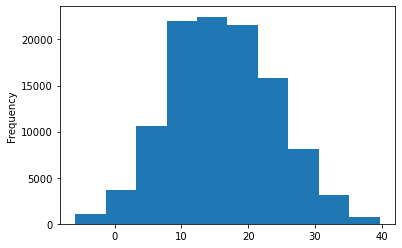

In [137]:
dfMeteoBC.temperature.plot(kind='hist')

In [138]:
dfMeteoBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109296 entries, 13660 to 109264
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype              
---  ------                                      --------------   -----              
 0   data                                        109296 non-null  object             
 1   id                                          109296 non-null  float64            
 2   humidite                                    109296 non-null  float64            
 3   direction_du_vecteur_de_vent_max            109296 non-null  float64            
 4   pluie_intensite_max                         109296 non-null  float64            
 5   pression                                    109296 non-null  float64            
 6   direction_du_vecteur_vent_moyen             109296 non-null  float64            
 7   type_de_station                             109296 non-null  object             
 8   pluie               

In [140]:
dfMeteoBCdt = dfMeteoBC.set_index('heure_utc').sort_index()
dfMeteoBCdt.head(5)

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2019-06-19 00:00:00+00:00,10d300318a000000c0084c00,8.0,64.0,4.0,0.0,90000.0,0.0,ISS,0.0,90.0,6.0,19.0,20.2,2019-06-19 02:00:00+02:00
2019-06-19 00:15:00+00:00,10d3005186080000a0063800,8.0,65.0,3.0,0.0,90000.0,0.0,ISS,0.0,67.5,5.0,14.0,20.1,2019-06-19 02:15:00+02:00
2019-06-19 00:30:00+00:00,10d30071661002d060183800,8.0,66.0,12.0,0.0,90000.0,90.0,ISS,0.0,270.0,3.0,14.0,19.9,2019-06-19 02:30:00+02:00
2019-06-19 00:45:00+00:00,10d300915e10000000181400,8.0,66.0,12.0,0.0,90000.0,0.0,ISS,0.0,270.0,0.0,5.0,19.7,2019-06-19 02:45:00+02:00
2019-06-19 01:00:00+00:00,10d300b1521802e040181400,8.0,67.0,12.0,0.0,90000.0,92.0,ISS,0.0,270.0,2.0,5.0,19.4,2019-06-19 03:00:00+02:00


In [141]:
# NB: index non unique
dfMeteoBC.set_index('temperature')

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,heure_de_paris,heure_utc
temperature,,,,,,,,,,,,,,
20.2,10d300318a000000c0084c00,8.0,64.0,4.0,0.0,90000.0,0.0,ISS,0.0,90.0,6.0,19.0,2019-06-19 02:00:00+02:00,2019-06-19 00:00:00+00:00
20.1,10d3005186080000a0063800,8.0,65.0,3.0,0.0,90000.0,0.0,ISS,0.0,67.5,5.0,14.0,2019-06-19 02:15:00+02:00,2019-06-19 00:15:00+00:00
19.9,10d30071661002d060183800,8.0,66.0,12.0,0.0,90000.0,90.0,ISS,0.0,270.0,3.0,14.0,2019-06-19 02:30:00+02:00,2019-06-19 00:30:00+00:00
19.7,10d300915e10000000181400,8.0,66.0,12.0,0.0,90000.0,0.0,ISS,0.0,270.0,0.0,5.0,2019-06-19 02:45:00+02:00,2019-06-19 00:45:00+00:00
19.4,10d300b1521802e040181400,8.0,67.0,12.0,0.0,90000.0,92.0,ISS,0.0,270.0,2.0,5.0,2019-06-19 03:00:00+02:00,2019-06-19 01:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25.5,11523692d60800002d2c4c00,8.0,65.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,1.0,19.0,2022-10-18 14:45:00+02:00,2022-10-18 12:45:00+00:00
25.6,115236b2da0800000d2c3800,8.0,65.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,0.0,14.0,2022-10-18 15:00:00+02:00,2022-10-18 13:00:00+00:00
25.7,115236d2de0000000d2c4000,8.0,64.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,0.0,16.0,2022-10-18 15:15:00+02:00,2022-10-18 13:15:00+00:00


In [142]:
dfMeteoBCdt.loc['2019']

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2019-06-19 00:00:00+00:00,10d300318a000000c0084c00,8.0,64.0,4.0,0.0,90000.0,0.0,ISS,0.0,90.0,6.0,19.0,20.2,2019-06-19 02:00:00+02:00
2019-06-19 00:15:00+00:00,10d3005186080000a0063800,8.0,65.0,3.0,0.0,90000.0,0.0,ISS,0.0,67.5,5.0,14.0,20.1,2019-06-19 02:15:00+02:00
2019-06-19 00:30:00+00:00,10d30071661002d060183800,8.0,66.0,12.0,0.0,90000.0,90.0,ISS,0.0,270.0,3.0,14.0,19.9,2019-06-19 02:30:00+02:00
2019-06-19 00:45:00+00:00,10d300915e10000000181400,8.0,66.0,12.0,0.0,90000.0,0.0,ISS,0.0,270.0,0.0,5.0,19.7,2019-06-19 02:45:00+02:00
2019-06-19 01:00:00+00:00,10d300b1521802e040181400,8.0,67.0,12.0,0.0,90000.0,92.0,ISS,0.0,270.0,2.0,5.0,19.4,2019-06-19 03:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00+00:00,119f0b8e62b000000e600000,8.0,86.0,0.0,0.0,101500.0,0.0,ISS,0.0,0.0,0.0,0.0,7.8,2019-12-31 23:45:00+01:00
2019-12-31 23:00:00+00:00,119f0bae62b000000e7c0c00,8.0,86.0,14.0,0.0,101500.0,0.0,ISS,0.0,315.0,0.0,3.0,7.8,2020-01-01 00:00:00+01:00
2019-12-31 23:15:00+00:00,119f0bce66b004300e7c0c40,8.0,86.0,14.0,0.2,101500.0,134.0,ISS,0.0,315.0,0.0,3.0,7.9,2020-01-01 00:15:00+01:00


In [143]:
dfMeteoBCdt.loc['2022-07']

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2022-07-01 00:00:00+00:00,10e1303016c804e00cfe1800,8.0,89.0,15.0,0.0,100300.0,156.0,ISS,0.0,337.5,0.0,6.0,14.5,2022-07-01 02:00:00+02:00
2022-07-01 00:15:00+00:00,10e1305016c804302cfc1800,8.0,89.0,14.0,0.0,100300.0,134.0,ISS,0.0,315.0,1.0,6.0,14.5,2022-07-01 02:15:00+02:00
2022-07-01 00:30:00+00:00,10e1307016c804300cfc1400,8.0,89.0,14.0,0.0,100300.0,134.0,ISS,0.0,315.0,0.0,5.0,14.5,2022-07-01 02:30:00+02:00
2022-07-01 00:45:00+00:00,10e1309016c800000cfc0c00,8.0,89.0,14.0,0.0,100300.0,0.0,ISS,0.0,315.0,0.0,3.0,14.5,2022-07-01 02:45:00+02:00
2022-07-01 01:00:00+00:00,10e130b016c800000ce00000,8.0,89.0,0.0,0.0,100300.0,0.0,ISS,0.0,0.0,0.0,0.0,14.5,2022-07-01 03:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 22:45:00+00:00,10ff3b9305c000000cc00000,8.0,56.0,0.0,0.0,100200.0,0.0,ISS,0.0,0.0,0.0,0.0,26.1,2022-08-01 00:45:00+02:00
2022-07-31 23:00:00+00:00,10ff3bb2e5c800000cc00000,8.0,57.0,0.0,0.0,100200.0,0.0,ISS,0.0,0.0,0.0,0.0,25.9,2022-08-01 01:00:00+02:00
2022-07-31 23:15:00+00:00,10ff3bd2ddd800000cc00000,8.0,59.0,0.0,0.0,100200.0,0.0,ISS,0.0,0.0,0.0,0.0,25.7,2022-08-01 01:15:00+02:00


In [144]:
dfMeteoBCdt.loc['2022-07-14']

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2022-07-14 00:00:00+00:00,10ee303305c800000ce00000,8.0,57.0,0.0,0.0,100300.0,0.0,ISS,0.0,0.0,0.0,0.0,26.1,2022-07-14 02:00:00+02:00
2022-07-14 00:15:00+00:00,10ee3052e1d000000cc00000,8.0,58.0,0.0,0.0,100200.0,0.0,ISS,0.0,0.0,0.0,0.0,25.8,2022-07-14 02:15:00+02:00
2022-07-14 00:30:00+00:00,10ee3072d9e000000cc00000,8.0,60.0,0.0,0.0,100200.0,0.0,ISS,0.0,0.0,0.0,0.0,25.6,2022-07-14 02:30:00+02:00
2022-07-14 00:45:00+00:00,10ee3092c9f000000cc00000,8.0,62.0,0.0,0.0,100200.0,0.0,ISS,0.0,0.0,0.0,0.0,25.2,2022-07-14 02:45:00+02:00
2022-07-14 01:00:00+00:00,10ee30b2a5f800000cc00000,8.0,63.0,0.0,0.0,100200.0,0.0,ISS,0.0,0.0,0.0,0.0,24.9,2022-07-14 03:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-14 22:45:00+00:00,10ee3b93917800000cbe0800,8.0,47.0,15.0,0.0,100100.0,0.0,ISS,0.0,337.5,0.0,2.0,28.4,2022-07-15 00:45:00+02:00
2022-07-14 23:00:00+00:00,10ee3bb35d8800000ca00000,8.0,49.0,0.0,0.0,100100.0,0.0,ISS,0.0,0.0,0.0,0.0,27.7,2022-07-15 01:00:00+02:00
2022-07-14 23:15:00+00:00,10ee3bd3499000000ca00000,8.0,50.0,0.0,0.0,100100.0,0.0,ISS,0.0,0.0,0.0,0.0,27.2,2022-07-15 01:15:00+02:00


In [147]:
# slices .loc range inclus des 2 côtés
dfMeteoBCdt.loc['2022-07-01':'2022-07-15']

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2022-07-01 00:00:00+00:00,10e1303016c804e00cfe1800,8.0,89.0,15.0,0.0,100300.0,156.0,ISS,0.0,337.5,0.0,6.0,14.5,2022-07-01 02:00:00+02:00
2022-07-01 00:15:00+00:00,10e1305016c804302cfc1800,8.0,89.0,14.0,0.0,100300.0,134.0,ISS,0.0,315.0,1.0,6.0,14.5,2022-07-01 02:15:00+02:00
2022-07-01 00:30:00+00:00,10e1307016c804300cfc1400,8.0,89.0,14.0,0.0,100300.0,134.0,ISS,0.0,315.0,0.0,5.0,14.5,2022-07-01 02:30:00+02:00
2022-07-01 00:45:00+00:00,10e1309016c800000cfc0c00,8.0,89.0,14.0,0.0,100300.0,0.0,ISS,0.0,315.0,0.0,3.0,14.5,2022-07-01 02:45:00+02:00
2022-07-01 01:00:00+00:00,10e130b016c800000ce00000,8.0,89.0,0.0,0.0,100300.0,0.0,ISS,0.0,0.0,0.0,0.0,14.5,2022-07-01 03:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15 22:45:00+00:00,10ef3b93656000000c800000,8.0,44.0,0.0,0.0,100000.0,0.0,ISS,0.0,0.0,0.0,0.0,27.9,2022-07-16 00:45:00+02:00
2022-07-15 23:00:00+00:00,10ef3bb3516800000c800000,8.0,45.0,0.0,0.0,100000.0,0.0,ISS,0.0,0.0,0.0,0.0,27.4,2022-07-16 01:00:00+02:00
2022-07-15 23:15:00+00:00,10ef3bd3257000000c800000,8.0,46.0,0.0,0.0,100000.0,0.0,ISS,0.0,0.0,0.0,0.0,26.9,2022-07-16 01:15:00+02:00


In [148]:
# slices .iloc range min inclus, max exclus
dfMeteoBCdt.iloc[:5]

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2019-06-19 00:00:00+00:00,10d300318a000000c0084c00,8.0,64.0,4.0,0.0,90000.0,0.0,ISS,0.0,90.0,6.0,19.0,20.2,2019-06-19 02:00:00+02:00
2019-06-19 00:15:00+00:00,10d3005186080000a0063800,8.0,65.0,3.0,0.0,90000.0,0.0,ISS,0.0,67.5,5.0,14.0,20.1,2019-06-19 02:15:00+02:00
2019-06-19 00:30:00+00:00,10d30071661002d060183800,8.0,66.0,12.0,0.0,90000.0,90.0,ISS,0.0,270.0,3.0,14.0,19.9,2019-06-19 02:30:00+02:00
2019-06-19 00:45:00+00:00,10d300915e10000000181400,8.0,66.0,12.0,0.0,90000.0,0.0,ISS,0.0,270.0,0.0,5.0,19.7,2019-06-19 02:45:00+02:00
2019-06-19 01:00:00+00:00,10d300b1521802e040181400,8.0,67.0,12.0,0.0,90000.0,92.0,ISS,0.0,270.0,2.0,5.0,19.4,2019-06-19 03:00:00+02:00


In [150]:
dfMeteoBCdt.iloc[-2:]

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2022-10-18 13:30:00+00:00,115236f2da0800000d2c3800,8.0,65.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,0.0,14.0,25.6,2022-10-18 15:30:00+02:00
2022-10-18 13:45:00+00:00,11523712da0800000d2c2c00,8.0,65.0,6.0,0.0,100500.0,0.0,ISS,0.0,135.0,0.0,11.0,25.6,2022-10-18 15:45:00+02:00


In [152]:
lastData = dfMeteoBCdt.iloc[-1]
lastData

data                                           11523712da0800000d2c2c00
id                                                                  8.0
humidite                                                           65.0
direction_du_vecteur_de_vent_max                                    6.0
pluie_intensite_max                                                 0.0
pression                                                       100500.0
direction_du_vecteur_vent_moyen                                     0.0
type_de_station                                                     ISS
pluie                                                               0.0
direction_du_vecteur_de_rafale_de_vent_max                        135.0
force_moyenne_du_vecteur_vent                                       0.0
force_rafale_max                                                   11.0
temperature                                                        25.6
heure_de_paris                                2022-10-18 15:45:0

In [159]:
print(type(lastData))
print(lastData.pression)
print(lastData['pression'])
print(lastData[['temperature','pression']])

<class 'pandas.core.series.Series'>
100500.0
100500.0
temperature        25.6
pression       100500.0
Name: 2022-10-18 13:45:00+00:00, dtype: object


In [158]:
dfMeteoBCdt.dtypes

data                                           object
id                                            float64
humidite                                      float64
direction_du_vecteur_de_vent_max              float64
pluie_intensite_max                           float64
pression                                      float64
direction_du_vecteur_vent_moyen               float64
type_de_station                                object
pluie                                         float64
direction_du_vecteur_de_rafale_de_vent_max    float64
force_moyenne_du_vecteur_vent                 float64
force_rafale_max                              float64
temperature                                   float64
heure_de_paris                                 object
dtype: object

In [161]:
dataNumeric = lastData[['temperature','pression']].astype('float64')
dataNumeric

temperature        25.6
pression       100500.0
Name: 2022-10-18 13:45:00+00:00, dtype: float64

In [162]:
dataNumeric ** 2 + 1

temperature    6.563600e+02
pression       1.010025e+10
Name: 2022-10-18 13:45:00+00:00, dtype: float64

In [163]:
dataNumeric[dataNumeric > 100]

pression    100500.0
Name: 2022-10-18 13:45:00+00:00, dtype: float64

In [166]:
dataNumeric.values # => numpy ndarray

array([2.560e+01, 1.005e+05])

In [167]:
dfMeteoBCdt.loc['2022-06':'2022-09', 'temperature'].head(3)

heure_utc
2022-06-01 00:00:00+00:00    21.0
2022-06-01 00:15:00+00:00    20.7
2022-06-01 00:30:00+00:00    20.5
Name: temperature, dtype: float64

In [168]:
dfMeteoBCdt.loc['2022-06':'2022-09', ['temperature', 'pression']].head(3)

,temperature,pression
heure_utc,,
2022-06-01 00:00:00+00:00,21.0,99700.0
2022-06-01 00:15:00+00:00,20.7,99700.0
2022-06-01 00:30:00+00:00,20.5,99700.0


In [171]:
dfMeteoBCdtNumeric = dfMeteoBCdt[['humidite',
       'pluie_intensite_max', 'pression', 
       'pluie',
      'temperature']]
dfMeteoBCdtNumeric.head(2)

,humidite,pluie_intensite_max,pression,pluie,temperature
heure_utc,,,,,
2019-06-19 00:00:00+00:00,64.0,0.0,90000.0,0.0,20.2
2019-06-19 00:15:00+00:00,65.0,0.0,90000.0,0.0,20.1


In [172]:
dfMeteoBCdtNumeric.loc['2022-06':'2022-09', 'pression':'temperature'].head(3)

,pression,pluie,temperature
heure_utc,,,
2022-06-01 00:00:00+00:00,99700.0,0.0,21.0
2022-06-01 00:15:00+00:00,99700.0,0.0,20.7
2022-06-01 00:30:00+00:00,99700.0,0.0,20.5


In [173]:
dfMeteoBCdtNumeric.iloc[:3, :3]

,humidite,pluie_intensite_max,pression
heure_utc,,,
2019-06-19 00:00:00+00:00,64.0,0.0,90000.0
2019-06-19 00:15:00+00:00,65.0,0.0,90000.0
2019-06-19 00:30:00+00:00,66.0,0.0,90000.0


In [174]:
dfMeteoBCdt[dfMeteoBCdt.temperature.isna()].head(5)

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2019-06-19 09:30:00+00:00,10d304e00000000000000000,8.0,0.0,0.0,0.0,90000.0,0.0,ISS,0.0,0.0,0.0,0.0,NaN,2019-06-19 11:30:00+02:00
2019-06-19 09:45:00+00:00,10d305000000000000000000,8.0,0.0,0.0,0.0,90000.0,0.0,ISS,0.0,0.0,0.0,0.0,NaN,2019-06-19 11:45:00+02:00
2019-06-19 10:00:00+00:00,10d305200000000000000000,8.0,0.0,0.0,0.0,90000.0,0.0,ISS,0.0,0.0,0.0,0.0,NaN,2019-06-19 12:00:00+02:00
2019-06-19 10:15:00+00:00,10d305400000000000000000,8.0,0.0,0.0,0.0,90000.0,0.0,ISS,0.0,0.0,0.0,0.0,NaN,2019-06-19 12:15:00+02:00
2019-06-19 10:30:00+00:00,10d305600000000000000000,8.0,0.0,0.0,0.0,90000.0,0.0,ISS,0.0,0.0,0.0,0.0,NaN,2019-06-19 12:30:00+02:00


In [175]:
dfMeteoBCdt.temperature.isna?

Signature: dfMeteoBCdt.temperature.isna() -> 'Series'
Docstring:
Detect missing values.

Return a boolean same-sized object indicating if the values are NA.
NA values, such as None or :attr:`numpy.NaN`, gets mapped to True
values.
Everything else gets mapped to False values. Characters such as empty
strings ``''`` or :attr:`numpy.inf` are not considered NA values
(unless you set ``pandas.options.mode.use_inf_as_na = True``).

Returns
-------
Series
    Mask of bool values for each element in Series that
    indicates whether an element is an NA value.

See Also
--------
Series.isnull : Alias of isna.
Series.notna : Boolean inverse of isna.
Series.dropna : Omit axes labels with missing values.
isna : Top-level isna.

Examples
--------
Show which entries in a DataFrame are NA.

>>> df = pd.DataFrame(dict(age=[5, 6, np.NaN],
...                    born=[pd.NaT, pd.Timestamp('1939-05-27'),
...                          pd.Timestamp('1940-04-25')],
...                    name=['Alfred', 'Bat

In [177]:
df6.nom.str.strip?

Signature: df6.nom.str.strip(to_strip=None)
Docstring:
Remove leading and trailing characters.

Strip whitespaces (including newlines) or a set of specified characters
from each string in the Series/Index from left and right sides.
Equivalent to :meth:`str.strip`.

Parameters
----------
to_strip : str or None, default None
    Specifying the set of characters to be removed.
    All combinations of this set of characters will be stripped.
    If None then whitespaces are removed.

Returns
-------
Series or Index of object

See Also
--------
Series.str.strip : Remove leading and trailing characters in Series/Index.
Series.str.lstrip : Remove leading characters in Series/Index.
Series.str.rstrip : Remove trailing characters in Series/Index.

Examples
--------
>>> s = pd.Series(['1. Ant.  ', '2. Bee!\n', '3. Cat?\t', np.nan])
>>> s
0    1. Ant.
1    2. Bee!\n
2    3. Cat?\t
3          NaN
dtype: object

>>> s.str.strip()
0    1. Ant.
1    2. Bee!
2    3. Cat?
3        NaN
dtype: object

>>

In [179]:
'  \t  \n \r  Toulouse \n\r  \t ville    rose \n\r  \t  '.strip()

'Toulouse \n\r  \t ville    rose'

In [182]:
df6.nom.str.replace?

Signature:
df6.nom.str.replace(
    pat: 'str | re.Pattern',
    repl: 'str | Callable',
    n: 'int' = -1,
    case: 'bool | None' = None,
    flags: 'int' = 0,
    regex: 'bool | None' = None,
)
Docstring:
Replace each occurrence of pattern/regex in the Series/Index.

Equivalent to :meth:`str.replace` or :func:`re.sub`, depending on
the regex value.

Parameters
----------
pat : str or compiled regex
    String can be a character sequence or regular expression.
repl : str or callable
    Replacement string or a callable. The callable is passed the regex
    match object and must return a replacement string to be used.
    See :func:`re.sub`.
n : int, default -1 (all)
    Number of replacements to make from start.
case : bool, default None
    Determines if replace is case sensitive:

    - If True, case sensitive (the default if `pat` is a string)
    - Set to False for case insensitive
    - Cannot be set if `pat` is a compiled regex.

flags : int, default 0 (no flags)
    Regex modu

In [184]:
df6.loc[4] = ('31001','  \t  \n \r  Toulouse \n\r  \t ville    rose \n\r  \t  ',45, '')
df6

,cp,nom,population,nom_maj
0,31700,Blagnac,27000,BLAGNAC
1,64000,Pau,77000,PAU
2,31000,Toulouse,450000,TOULOUSE
3,51160,Aÿ,3978,AŸ
4,31001,\t \n \r Toulouse \n\r \t ville rose \...,45,


In [190]:
df6.nom = df6.nom.str.strip().str.replace(r'[\s]+',' ', regex=True)
df6

,cp,nom,population,nom_maj
0,31700,Blagnac,27000,BLAGNAC
1,64000,Pau,77000,PAU
2,31000,Toulouse,450000,TOULOUSE
3,51160,Aÿ,3978,AŸ
4,31001,Toulouse ville rose,45,


In [187]:
df6.nom.str.replace?

Signature:
df6.nom.str.replace(
    pat: 'str | re.Pattern',
    repl: 'str | Callable',
    n: 'int' = -1,
    case: 'bool | None' = None,
    flags: 'int' = 0,
    regex: 'bool | None' = None,
)
Docstring:
Replace each occurrence of pattern/regex in the Series/Index.

Equivalent to :meth:`str.replace` or :func:`re.sub`, depending on
the regex value.

Parameters
----------
pat : str or compiled regex
    String can be a character sequence or regular expression.
repl : str or callable
    Replacement string or a callable. The callable is passed the regex
    match object and must return a replacement string to be used.
    See :func:`re.sub`.
n : int, default -1 (all)
    Number of replacements to make from start.
case : bool, default None
    Determines if replace is case sensitive:

    - If True, case sensitive (the default if `pat` is a string)
    - Set to False for case insensitive
    - Cannot be set if `pat` is a compiled regex.

flags : int, default 0 (no flags)
    Regex modu

In [191]:
def correctionTemperature(t):
    return 1.01*t+0.03

In [192]:
correctionTemperature(24.5)

24.775000000000002

In [193]:
dfMeteoBCdt.temperature.apply(correctionTemperature)

heure_utc
2019-06-19 00:00:00+00:00    20.432
2019-06-19 00:15:00+00:00    20.331
2019-06-19 00:30:00+00:00    20.129
2019-06-19 00:45:00+00:00    19.927
2019-06-19 01:00:00+00:00    19.624
                              ...  
2022-10-18 12:45:00+00:00    25.785
2022-10-18 13:00:00+00:00    25.886
2022-10-18 13:15:00+00:00    25.987
2022-10-18 13:30:00+00:00    25.886
2022-10-18 13:45:00+00:00    25.886
Name: temperature, Length: 109296, dtype: float64

In [194]:
def correctionTemperature2(t, coef, biais):
    return coef * t + biais

In [198]:
dfMeteoBCdt.temperature.apply(lambda t: correctionTemperature2(t,1.2,0.5))

heure_utc
2019-06-19 00:00:00+00:00    24.74
2019-06-19 00:15:00+00:00    24.62
2019-06-19 00:30:00+00:00    24.38
2019-06-19 00:45:00+00:00    24.14
2019-06-19 01:00:00+00:00    23.78
                             ...  
2022-10-18 12:45:00+00:00    31.10
2022-10-18 13:00:00+00:00    31.22
2022-10-18 13:15:00+00:00    31.34
2022-10-18 13:30:00+00:00    31.22
2022-10-18 13:45:00+00:00    31.22
Name: temperature, Length: 109296, dtype: float64

In [200]:
dfMeteoBCdt.temperature.apply(correctionTemperature2, args=(1.2,0.5))

heure_utc
2019-06-19 00:00:00+00:00    24.74
2019-06-19 00:15:00+00:00    24.62
2019-06-19 00:30:00+00:00    24.38
2019-06-19 00:45:00+00:00    24.14
2019-06-19 01:00:00+00:00    23.78
                             ...  
2022-10-18 12:45:00+00:00    31.10
2022-10-18 13:00:00+00:00    31.22
2022-10-18 13:15:00+00:00    31.34
2022-10-18 13:30:00+00:00    31.22
2022-10-18 13:45:00+00:00    31.22
Name: temperature, Length: 109296, dtype: float64

In [202]:
dfMeteoBCdt.temperature.apply(correctionTemperature2, coef=1.2, biais=0.5)

heure_utc
2019-06-19 00:00:00+00:00    24.74
2019-06-19 00:15:00+00:00    24.62
2019-06-19 00:30:00+00:00    24.38
2019-06-19 00:45:00+00:00    24.14
2019-06-19 01:00:00+00:00    23.78
                             ...  
2022-10-18 12:45:00+00:00    31.10
2022-10-18 13:00:00+00:00    31.22
2022-10-18 13:15:00+00:00    31.34
2022-10-18 13:30:00+00:00    31.22
2022-10-18 13:45:00+00:00    31.22
Name: temperature, Length: 109296, dtype: float64

In [205]:
dfMeteoBCdt[['temperature','pression']].head(3)

,temperature,pression
heure_utc,,
2019-06-19 00:00:00+00:00,20.2,90000.0
2019-06-19 00:15:00+00:00,20.1,90000.0
2019-06-19 00:30:00+00:00,19.9,90000.0


In [209]:
# check axis ;) 0 sur des colonnes, 1 sur ligne
dfMeteoBCdt.apply(lambda row: row.pression / (row.temperature+50), axis=1)

heure_utc
2019-06-19 00:00:00+00:00    1282.051282
2019-06-19 00:15:00+00:00    1283.880171
2019-06-19 00:30:00+00:00    1287.553648
2019-06-19 00:45:00+00:00    1291.248207
2019-06-19 01:00:00+00:00    1296.829971
                                ...     
2022-10-18 12:45:00+00:00    1331.125828
2022-10-18 13:00:00+00:00    1329.365079
2022-10-18 13:15:00+00:00    1327.608983
2022-10-18 13:30:00+00:00    1329.365079
2022-10-18 13:45:00+00:00    1329.365079
Length: 109296, dtype: float64

In [216]:
def f(pression, temperature, **kwargs):
    return pression / (temperature+50)

def f2(pression, temperature):
    return pression / (temperature+50)

In [213]:
dfMeteoBCdt.apply(lambda row: f(**row), axis=1).head(2)

heure_utc
2019-06-19 00:00:00+00:00    1282.051282
2019-06-19 00:15:00+00:00    1283.880171
dtype: float64

In [217]:
dfMeteoBCdt[['pression','temperature']].apply(lambda row: f2(**row), axis=1).head(2)

heure_utc
2019-06-19 00:00:00+00:00    1282.051282
2019-06-19 00:15:00+00:00    1283.880171
dtype: float64

In [221]:
dfMeteoBCdt['temperature_corr'] = dfMeteoBCdt[['pression','temperature']].apply(lambda row: f2(**row), axis=1)
dfMeteoBCdt.iloc[:2,-2:]


,heure_de_paris,temperature_corr
heure_utc,,
2019-06-19 00:00:00+00:00,2019-06-19 02:00:00+02:00,1282.051282
2019-06-19 00:15:00+00:00,2019-06-19 02:15:00+02:00,1283.880171


In [220]:
dfMeteoBCdt.apply(lambda row: (row.temperature*1.01, row.temperature*1.5), axis=1).head(3)

heure_utc
2019-06-19 00:00:00+00:00                (20.402, 30.299999999999997)
2019-06-19 00:15:00+00:00    (20.301000000000002, 30.150000000000002)
2019-06-19 00:30:00+00:00                (20.099, 29.849999999999998)
dtype: object

In [227]:
dfMeteoBCdt[['temperature_coef1', 'temperature_coef2' ]] = dfMeteoBCdt.apply(
            lambda row: (row.temperature*1.01, row.temperature*1.5), 
            axis=1, result_type='expand')
dfMeteoBCdt.iloc[:3,-4:]

,heure_de_paris,temperature_corr,temperature_coef1,temperature_coef2
heure_utc,,,,
2019-06-19 00:00:00+00:00,2019-06-19 02:00:00+02:00,1282.051282,20.402,30.30
2019-06-19 00:15:00+00:00,2019-06-19 02:15:00+02:00,1283.880171,20.301,30.15
2019-06-19 00:30:00+00:00,2019-06-19 02:30:00+02:00,1287.553648,20.099,29.85


In [229]:
dfMeteoBCdt.iloc[:10000:1000, -4:]

,heure_de_paris,temperature_corr,temperature_coef1,temperature_coef2
heure_utc,,,,
2019-06-19 00:00:00+00:00,2019-06-19 02:00:00+02:00,1282.051282,20.402,30.30
2019-06-29 11:00:00+00:00,2019-06-29 13:00:00+02:00,1194.011976,33.835,50.25
2019-07-09 22:00:00+00:00,2019-07-10 00:00:00+02:00,1427.142857,20.200,30.00
2019-07-20 08:00:00+00:00,2019-07-20 10:00:00+02:00,1403.089888,21.412,31.80
2019-07-30 18:15:00+00:00,2019-07-30 20:15:00+02:00,1419.263456,20.806,30.90
2019-08-10 04:15:00+00:00,2019-08-10 06:15:00+02:00,1446.531792,19.392,28.80
2019-08-20 14:15:00+00:00,2019-08-20 16:15:00+02:00,1426.950355,20.705,30.75
2019-08-31 00:15:00+00:00,2019-08-31 02:15:00+02:00,1372.252747,23.028,34.20
2019-09-10 10:15:00+00:00,2019-09-10 12:15:00+02:00,1512.121212,16.160,24.00


In [230]:
dfMeteoBCdt.columns

Index(['data', 'id', 'humidite', 'direction_du_vecteur_de_vent_max',
       'pluie_intensite_max', 'pression', 'direction_du_vecteur_vent_moyen',
       'type_de_station', 'pluie',
       'direction_du_vecteur_de_rafale_de_vent_max',
       'force_moyenne_du_vecteur_vent', 'force_rafale_max', 'temperature',
       'heure_de_paris', 'temperature_corr', 'temperature_coef1',
       'temperature_coef2'],
      dtype='object')

In [231]:
dfMeteoBCdt.type_de_station.unique()

array(['ISS'], dtype=object)

In [233]:
dfMeteoBCdt.where(dfMeteoBCdt.temperature > 20, 0).head(10)

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,temperature_corr,temperature_coef1,temperature_coef2
heure_utc,,,,,,,,,,,,,,,,,
2019-06-19 00:00:00+00:00,10d300318a000000c0084c00,8.0,64.0,4.0,0.0,90000.0,0.0,ISS,0.0,90.0,6.0,19.0,20.2,2019-06-19 02:00:00+02:00,1282.051282,20.402,30.30
2019-06-19 00:15:00+00:00,10d3005186080000a0063800,8.0,65.0,3.0,0.0,90000.0,0.0,ISS,0.0,67.5,5.0,14.0,20.1,2019-06-19 02:15:00+02:00,1283.880171,20.301,30.15
2019-06-19 00:30:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000,0.00
2019-06-19 00:45:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000,0.00
2019-06-19 01:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000,0.00
2019-06-19 01:15:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000,0.00
2019-06-19 01:30:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000,0.00
2019-06-19 01:45:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000,0.00
2019-06-19 02:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000,0.00


In [238]:
dfMeteoBCdt.temperature.where(dfMeteoBCdt.temperature.isna(), 
                  dfMeteoBCdt.pression / dfMeteoBCdt.temperature).head(10)

heure_utc
2019-06-19 00:00:00+00:00    4455.445545
2019-06-19 00:15:00+00:00    4477.611940
2019-06-19 00:30:00+00:00    4522.613065
2019-06-19 00:45:00+00:00    4568.527919
2019-06-19 01:00:00+00:00    4639.175258
2019-06-19 01:15:00+00:00    4687.500000
2019-06-19 01:30:00+00:00    4761.904762
2019-06-19 01:45:00+00:00    4787.234043
2019-06-19 02:00:00+00:00    4736.842105
2019-06-19 02:15:00+00:00    4787.234043
Name: temperature, dtype: float64

In [239]:
# transformer une colonne (ou tout le dataframe) partout où la condition est fausse
# pour l'inverse => mask
dfMeteoBCdt['inv_vol'] = dfMeteoBCdt.temperature.where(dfMeteoBCdt.temperature.isna(), 
                  dfMeteoBCdt.pression / dfMeteoBCdt.temperature)
dfMeteoBCdt.head(10)

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,temperature_corr,temperature_coef1,temperature_coef2,inv_vol
heure_utc,,,,,,,,,,,,,,,,,,
2019-06-19 00:00:00+00:00,10d300318a000000c0084c00,8.0,64.0,4.0,0.0,90000.0,0.0,ISS,0.0,90.0,6.0,19.0,20.2,2019-06-19 02:00:00+02:00,1282.051282,20.402,30.30,4455.445545
2019-06-19 00:15:00+00:00,10d3005186080000a0063800,8.0,65.0,3.0,0.0,90000.0,0.0,ISS,0.0,67.5,5.0,14.0,20.1,2019-06-19 02:15:00+02:00,1283.880171,20.301,30.15,4477.611940
2019-06-19 00:30:00+00:00,10d30071661002d060183800,8.0,66.0,12.0,0.0,90000.0,90.0,ISS,0.0,270.0,3.0,14.0,19.9,2019-06-19 02:30:00+02:00,1287.553648,20.099,29.85,4522.613065
2019-06-19 00:45:00+00:00,10d300915e10000000181400,8.0,66.0,12.0,0.0,90000.0,0.0,ISS,0.0,270.0,0.0,5.0,19.7,2019-06-19 02:45:00+02:00,1291.248207,19.897,29.55,4568.527919
2019-06-19 01:00:00+00:00,10d300b1521802e040181400,8.0,67.0,12.0,0.0,90000.0,92.0,ISS,0.0,270.0,2.0,5.0,19.4,2019-06-19 03:00:00+02:00,1296.829971,19.594,29.10,4639.175258
2019-06-19 01:15:00+00:00,10d300d14a28033000181400,8.0,69.0,12.0,0.0,90000.0,102.0,ISS,0.0,270.0,0.0,5.0,19.2,2019-06-19 03:15:00+02:00,1300.578035,19.392,28.80,4687.500000
2019-06-19 01:30:00+00:00,10d300f12638030060162c00,8.0,71.0,11.0,0.0,90000.0,96.0,ISS,0.0,247.5,3.0,11.0,18.9,2019-06-19 03:30:00+02:00,1306.240929,19.089,28.35,4761.904762
2019-06-19 01:45:00+00:00,10d30111224002d0a0163400,8.0,72.0,11.0,0.0,90000.0,90.0,ISS,0.0,247.5,5.0,13.0,18.8,2019-06-19 03:45:00+02:00,1308.139535,18.988,28.20,4787.234043
2019-06-19 02:00:00+00:00,10d301314250030060182c00,8.0,74.0,12.0,0.0,90000.0,96.0,ISS,0.0,270.0,3.0,11.0,19.0,2019-06-19 04:00:00+02:00,1304.347826,19.190,28.50,4736.842105


In [243]:
pd.cut(dfMeteoBCdt.temperature, 10)

heure_utc
2019-06-19 00:00:00+00:00     (16.9, 21.46]
2019-06-19 00:15:00+00:00     (16.9, 21.46]
2019-06-19 00:30:00+00:00     (16.9, 21.46]
2019-06-19 00:45:00+00:00     (16.9, 21.46]
2019-06-19 01:00:00+00:00     (16.9, 21.46]
                                  ...      
2022-10-18 12:45:00+00:00    (21.46, 26.02]
2022-10-18 13:00:00+00:00    (21.46, 26.02]
2022-10-18 13:15:00+00:00    (21.46, 26.02]
2022-10-18 13:30:00+00:00    (21.46, 26.02]
2022-10-18 13:45:00+00:00    (21.46, 26.02]
Name: temperature, Length: 109296, dtype: category
Categories (10, interval[float64, right]): [(-5.946, -1.34] < (-1.34, 3.22] < (3.22, 7.78] < (7.78, 12.34] ... (21.46, 26.02] < (26.02, 30.58] < (30.58, 35.14] < (35.14, 39.7]]

In [249]:
dfMeteoBCdt['categorie'] = pd.cut(dfMeteoBCdt.temperature, np.arange(-10,50,10))
dfMeteoBCdt.iloc[:5, -2:]

,inv_vol,categorie
heure_utc,,
2019-06-19 00:00:00+00:00,4455.445545,"(20, 30]"
2019-06-19 00:15:00+00:00,4477.611940,"(20, 30]"
2019-06-19 00:30:00+00:00,4522.613065,"(10, 20]"
2019-06-19 00:45:00+00:00,4568.527919,"(10, 20]"
2019-06-19 01:00:00+00:00,4639.175258,"(10, 20]"


In [247]:
dfMeteoBCdt.iloc[0,-1]

Interval(20, 30, closed='right')

In [250]:
dfMeteoBCdt.categorie.unique()

[(20.0, 30.0], (10.0, 20.0], NaN, (30.0, 40.0], (0.0, 10.0], (-10.0, 0.0]]
Categories (5, interval[int64, right]): [(-10, 0] < (0, 10] < (10, 20] < (20, 30] < (30, 40]]

In [252]:
dfMeteoBCdt.loc[~dfMeteoBCdt.categorie.isna()].groupby('categorie').count()

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,temperature_corr,temperature_coef1,temperature_coef2,inv_vol
categorie,,,,,,,,,,,,,,,,,,
"(-10, 0]",1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300
"(0, 10]",24321,24321,24321,24321,24321,24321,24321,24321,24321,24321,24321,24321,24321,24321,24321,24321,24321,24321
"(10, 20]",49457,49457,49457,49457,49457,49457,49457,49457,49457,49457,49457,49457,49457,49457,49457,49457,49457,49457
"(20, 30]",29788,29788,29788,29788,29788,29788,29788,29788,29788,29788,29788,29788,29788,29788,29788,29788,29788,29788
"(30, 40]",4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411


In [253]:
dfMeteoBCdt.loc[~dfMeteoBCdt.categorie.isna()].groupby('categorie')[['temperature', 'pression']].mean()

,temperature,pression
categorie,,
"(-10, 0]",-2.207077,100908.538462
"(0, 10]",6.575605,100193.330866
"(10, 20]",14.997436,99975.184504
"(20, 30]",24.033581,99934.285618
"(30, 40]",32.857357,99758.286103


In [254]:
dfMeteoBCdt.loc[~dfMeteoBCdt.categorie.isna()].groupby('categorie')[['temperature', 'pression']].agg(
    ['min','max','mean','count'])  # stats pandas (nan insensitive)

temperature                         pression            \
                  min   max       mean  count      min       max   
categorie                                                          
(-10, 0]         -5.9   0.0  -2.207077   1300  99200.0  101900.0   
(0, 10]           0.1  10.0   6.575605  24321  90000.0  102100.0   
(10, 20]         10.1  20.0  14.997436  49457  90000.0  101800.0   
(20, 30]         20.1  30.0  24.033581  29788  90000.0  101400.0   
(30, 40]         30.1  39.7  32.857357   4411  98700.0  100700.0   

                                 
                    mean  count  
categorie                        
(-10, 0]   100908.538462   1300  
(0, 10]    100193.330866  24321  
(10, 20]    99975.184504  49457  
(20, 30]    99934.285618  29788  
(30, 40]    99758.286103   4411

In [257]:
stats = dfMeteoBCdt.loc[~dfMeteoBCdt.categorie.isna()].groupby('categorie')[['temperature', 'pression']].agg(
    ['min', np.max, sum, statistics.mean])
stats

temperature                            pression            \
                  min  amax       sum       mean      min      amax   
categorie                                                             
(-10, 0]         -5.9   0.0   -2869.2  -2.207077  99200.0  101900.0   
(0, 10]           0.1  10.0  159925.3   6.575605  90000.0  102100.0   
(10, 20]         10.1  20.0  741728.2  14.997436  90000.0  101800.0   
(20, 30]         20.1  30.0  715912.3  24.033581  90000.0  101400.0   
(30, 40]         30.1  39.7  144933.8  32.857357  98700.0  100700.0   

                                        
                    sum           mean  
categorie                               
(-10, 0]   1.311811e+08  100908.538462  
(0, 10]    2.436802e+09  100193.330866  
(10, 20]   4.944473e+09   99975.184504  
(20, 30]   2.976842e+09   99934.285618  
(30, 40]   4.400338e+08   99758.286103

In [262]:
statFunctions = ['min', np.max, statistics.mean]
stats2 = dfMeteoBCdt.loc[~dfMeteoBCdt.categorie.isna()].groupby('categorie').agg({
    'temperature' : statFunctions, 
    'pression': statFunctions, 
    'humidite': ['min','max']
})
stats2

temperature                  pression                           \
                  min  amax       mean      min      amax           mean   
categorie                                                                  
(-10, 0]         -5.9   0.0  -2.207077  99200.0  101900.0  100908.538462   
(0, 10]           0.1  10.0   6.575605  90000.0  102100.0  100193.330866   
(10, 20]         10.1  20.0  14.997436  90000.0  101800.0   99975.184504   
(20, 30]         20.1  30.0  24.033581  90000.0  101400.0   99934.285618   
(30, 40]         30.1  39.7  32.857357  98700.0  100700.0   99758.286103   

          humidite        
               min   max  
categorie                 
(-10, 0]      80.0  96.0  
(0, 10]       36.0  97.0  
(10, 20]      24.0  97.0  
(20, 30]      21.0  94.0  
(30, 40]      17.0  72.0

In [264]:
stats2.loc[: , 'temperature']

,min,amax,mean
categorie,,,
"(-10, 0]",-5.9,0.0,-2.207077
"(0, 10]",0.1,10.0,6.575605
"(10, 20]",10.1,20.0,14.997436
"(20, 30]",20.1,30.0,24.033581
"(30, 40]",30.1,39.7,32.857357


In [265]:
stats2.loc[: , ('temperature','min')]

categorie
(-10, 0]    -5.9
(0, 10]      0.1
(10, 20]    10.1
(20, 30]    20.1
(30, 40]    30.1
Name: (temperature, min), dtype: float64

In [271]:
# SyntaxError: invalid syntax
# stats2.loc[: , (:,'min')]
stats2.loc[: , (slice(None), 'min')]

,temperature,pression,humidite
,min,min,min
categorie,,,
"(-10, 0]",-5.9,99200.0,80.0
"(0, 10]",0.1,90000.0,36.0
"(10, 20]",10.1,90000.0,24.0
"(20, 30]",20.1,90000.0,21.0
"(30, 40]",30.1,98700.0,17.0


In [274]:
stats2.columns = [ 'tmin', 'tmax', 'tmean', 'pmin', 'pmax', 'pmean', 'hmin', 'hmax' ]
stats2.index = ['A', 'B', 'C', 'D', 'E']
stats2

,tmin,tmax,tmean,pmin,pmax,pmean,hmin,hmax
A,-5.9,0.0,-2.207077,99200.0,101900.0,100908.538462,80.0,96.0
B,0.1,10.0,6.575605,90000.0,102100.0,100193.330866,36.0,97.0
C,10.1,20.0,14.997436,90000.0,101800.0,99975.184504,24.0,97.0
D,20.1,30.0,24.033581,90000.0,101400.0,99934.285618,21.0,94.0
E,30.1,39.7,32.857357,98700.0,100700.0,99758.286103,17.0,72.0


In [277]:
dfMeteoBCdt.groupby(pd.Grouper(freq='1M')).count()

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,temperature_corr,temperature_coef1,temperature_coef2,inv_vol,categorie
heure_utc,,,,,,,,,,,,,,,,,,,
2019-06-30 00:00:00+00:00,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1139,1148,1139,1139,1139,1139,1139
2019-07-31 00:00:00+00:00,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971
2019-08-31 00:00:00+00:00,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976
2019-09-30 00:00:00+00:00,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880
2019-10-31 00:00:00+00:00,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2968,2971,2968,2968,2968,2968,2968
2019-11-30 00:00:00+00:00,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878
2019-12-31 00:00:00+00:00,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968
2020-01-31 00:00:00+00:00,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976
2020-02-29 00:00:00+00:00,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779


In [278]:
dfMeteoBC.groupby(pd.Grouper(key='heure_utc', freq='1M')).count()

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris
heure_utc,,,,,,,,,,,,,,
2019-06-30 00:00:00+00:00,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1139,1148
2019-07-31 00:00:00+00:00,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971
2019-08-31 00:00:00+00:00,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976
2019-09-30 00:00:00+00:00,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880
2019-10-31 00:00:00+00:00,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2968,2971
2019-11-30 00:00:00+00:00,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878
2019-12-31 00:00:00+00:00,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968
2020-01-31 00:00:00+00:00,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976
2020-02-29 00:00:00+00:00,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779


In [279]:
dfMeteoBCdt.groupby(pd.Grouper(freq='1M', origin='2019-06-01')).count()

,data,id,humidite,direction_du_vecteur_de_vent_max,pluie_intensite_max,pression,direction_du_vecteur_vent_moyen,type_de_station,pluie,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,temperature,heure_de_paris,temperature_corr,temperature_coef1,temperature_coef2,inv_vol,categorie
heure_utc,,,,,,,,,,,,,,,,,,,
2019-06-30 00:00:00+00:00,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1139,1148,1139,1139,1139,1139,1139
2019-07-31 00:00:00+00:00,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971
2019-08-31 00:00:00+00:00,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976
2019-09-30 00:00:00+00:00,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880
2019-10-31 00:00:00+00:00,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2968,2971,2968,2968,2968,2968,2968
2019-11-30 00:00:00+00:00,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878
2019-12-31 00:00:00+00:00,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968
2020-01-31 00:00:00+00:00,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976
2020-02-29 00:00:00+00:00,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779


In [291]:
# vous pouvez choiir en label borne de droite ou gauche: label='left'
stats3 = dfMeteoBC.groupby(pd.Grouper(key='heure_utc', freq='1M')).agg({
    'heure_utc': ['min', 'max'],
    'temperature': ['min', 'max', 'mean']
})
stats3.head(3)

heure_utc                            \
                                                min                       max   
heure_utc                                                                       
2019-06-30 00:00:00+00:00 2019-06-19 00:00:00+00:00 2019-06-30 23:45:00+00:00   
2019-07-31 00:00:00+00:00 2019-07-01 00:00:00+00:00 2019-07-31 23:45:00+00:00   
2019-08-31 00:00:00+00:00 2019-08-01 00:00:00+00:00 2019-08-31 23:45:00+00:00   

                          temperature                   
                                  min   max       mean  
heure_utc                                               
2019-06-30 00:00:00+00:00        14.2  39.7  24.569886  
2019-07-31 00:00:00+00:00        14.7  37.3  24.718075  
2019-08-31 00:00:00+00:00        13.1  35.9  23.504872

<AxesSubplot:xlabel='heure_utc'>

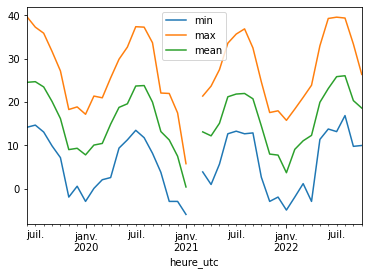

In [293]:
stats3.loc[:, 'temperature'].plot()

NB: graduations (ticker, major locator/formatter, minor locator/formatter)
- https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html
- https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

In [292]:
stats3.loc['2022-07']

heure_utc                            \
                                                min                       max   
heure_utc                                                                       
2022-07-31 00:00:00+00:00 2022-07-01 00:00:00+00:00 2022-07-31 23:45:00+00:00   

                          temperature                   
                                  min   max       mean  
heure_utc                                               
2022-07-31 00:00:00+00:00        13.2  39.6  25.877707

In [295]:
stats3.index = stats3.index.map(lambda dt: dt.strftime('%Y-%m')) 
stats3

heure_utc                           temperature  \
                                min                       max         min   
heure_utc                                                                   
2019-06   2019-06-19 00:00:00+00:00 2019-06-30 23:45:00+00:00        14.2   
2019-07   2019-07-01 00:00:00+00:00 2019-07-31 23:45:00+00:00        14.7   
2019-08   2019-08-01 00:00:00+00:00 2019-08-31 23:45:00+00:00        13.1   
2019-09   2019-09-01 00:00:00+00:00 2019-09-30 23:45:00+00:00         9.9   
2019-10   2019-10-01 00:00:00+00:00 2019-10-31 23:45:00+00:00         7.2   
2019-11   2019-11-01 00:00:00+00:00 2019-11-30 23:45:00+00:00        -1.9   
2019-12   2019-12-01 00:00:00+00:00 2019-12-31 23:45:00+00:00         0.6   
2020-01   2020-01-01 00:00:00+00:00 2020-01-31 23:45:00+00:00        -2.9   
2020-02   2020-02-01 00:00:00+00:00 2020-02-29 23:45:00+00:00         0.1   
2020-03   2020-03-01 00:00:00+00:00 2020-03-31 23:45:00+00:00         2.1   
2020-04   2020-04-01 00:00:00+00:00 2020-04-30 23:45:00+00:00         2.6   
2020-05   2020-05-01 00:00:00+00:00 2020-05-31 23:45:00+00:00         9.4   
2020-06   2020-06-01 00:00:00+00:00 2020-06-30 23:45:00+00:00        11.3   
2020-07   2020-07-01 00:00:00+00:00 2020-07-31 23:45:00+00:00        13.5   
2020-08   2020-08-01 00:00:00+00:00 2020-08-31 23:45:00+00:00        11.8   
2020-09   2020-09-01 00:00:00+00:00 2020-09-30 23:45:00+00:00         8.2   
2020-10   2020-10-01 00:00:00+00:00 2020-10-31 23:45:00+00:00         3.8   
2020-11   2020-11-01 00:00:00+00:00 2020-11-30 23:45:00+00:00        -2.9   
2020-12   2020-12-01 00:00:00+00:00 2020-12-31 23:45:00+00:00        -2.9   
2021-01   2021-01-01 00:00:00+00:00 2021-01-12 05:15:00+00:00        -5.9   
2021-02                         NaT                       NaT         NaN   
2021-03   2021-03-25 00:00:00+00:00 2021-03-31 23:45:00+00:00         3.9   
2021-04   2021-04-01 00:00:00+00:00 2021-04-30 23:45:00+00:00         1.0   
2021-05   2021-05-01 00:00:00+00:00 2021-05-31 23:45:00+00:00         5.7   
2021-06   2021-06-01 00:00:00+00:00 2021-06-30 23:45:00+00:00        12.7   
2021-07   2021-07-01 00:00:00+00:00 2021-07-31 23:45:00+00:00        13.3   
2021-08   2021-08-01 00:00:00+00:00 2021-08-31 23:45:00+00:00        12.7   
2021-09   2021-09-01 00:00:00+00:00 2021-09-30 13:45:00+00:00        12.9   
2021-10   2021-10-01 09:30:00+00:00 2021-10-31 23:45:00+00:00         2.7   
2021-11   2021-11-01 00:00:00+00:00 2021-11-30 23:45:00+00:00        -2.9   
2021-12   2021-12-01 00:00:00+00:00 2021-12-31 23:45:00+00:00        -1.9   
2022-01   2022-01-01 00:00:00+00:00 2022-01-31 23:45:00+00:00        -4.9   
2022-02   2022-02-01 00:00:00+00:00 2022-02-28 23:45:00+00:00        -1.9   
2022-03   2022-03-01 00:00:00+00:00 2022-03-31 23:45:00+00:00         1.2   
2022-04   2022-04-01 00:00:00+00:00 2022-04-30 23:45:00+00:00        -2.9   
2022-05   2022-05-01 00:00:00+00:00 2022-05-31 23:45:00+00:00        11.4   
2022-06   2022-06-01 00:00:00+00:00 2022-06-30 23:45:00+00:00        13.8   
2022-07   2022-07-01 00:00:00+00:00 2022-07-31 23:45:00+00:00        13.2   
2022-08   2022-08-01 00:00:00+00:00 2022-08-31 23:45:00+00:00        16.9   
2022-09   2022-09-01 00:00:00+00:00 2022-09-30 23:45:00+00:00         9.8   
2022-10   2022-10-01 00:00:00+00:00 2022-10-18 13:45:00+00:00        10.0   

                            
            max       mean  
heure_utc                   
2019-06    39.7  24.569886  
2019-07    37.3  24.718075  
2019-08    35.9  23.504872  
2019-09    31.7  20.147778  
2019-10    27.2  16.211489  
2019-11    18.3   9.049062  
2019-12    18.9   9.356098  
2020-01    17.2   7.835013  
2020-02    21.4  10.094854  
2020-03    21.0  10.473714  
2020-04    25.6  14.928606  
2020-05    29.9  18.792003  
2020-06    32.7  19.617674  
2020-07    37.4  23.719052  
2020-08    37.3  23.823858  
2020-09    33.7  19.999618  
2020-10    22.1  13.213046  
2020-11    22.0  11.276172  
2020-12    17.5   7.518817  

<AxesSubplot:xlabel='heure_utc'>

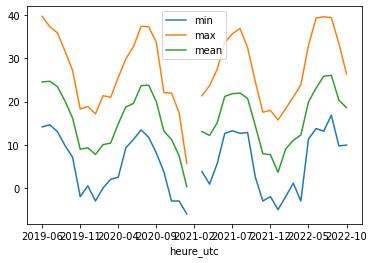

In [296]:
stats3.loc[:, 'temperature'].plot()

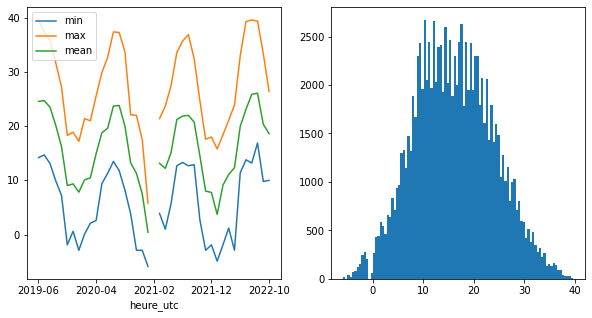

In [314]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10,5)
stats3.loc[:, 'temperature'].plot(ax=ax1)
_ = ax2.hist(dfMeteoBCdt.temperature, bins=100)

In [310]:
ax2.hist(dfMeteoBCdt.temperature, bins=2)

Signature:
ax2.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*, ...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.

P

In [317]:
for i,row in stats3[:3].iterrows():
    print(i)
    print(row)

2019-06
heure_utc    min     2019-06-19 00:00:00+00:00
             max     2019-06-30 23:45:00+00:00
temperature  min                          14.2
             max                          39.7
             mean                    24.569886
Name: 2019-06, dtype: object
2019-07
heure_utc    min     2019-07-01 00:00:00+00:00
             max     2019-07-31 23:45:00+00:00
temperature  min                          14.7
             max                          37.3
             mean                    24.718075
Name: 2019-07, dtype: object
2019-08
heure_utc    min     2019-08-01 00:00:00+00:00
             max     2019-08-31 23:45:00+00:00
temperature  min                          13.1
             max                          35.9
             mean                    23.504872
Name: 2019-08, dtype: object


NB: xml => modules python: xml,  tiers: lxml, beautifulsoup (html, xhtml, xml)

In [ ]:
fig.set